In [66]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import folium
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline
print('Packages installed ')

Packages installed 


In [67]:
# Get the neighbourhood data using beautiful soup 
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
result = requests.get(url)
data_html = BeautifulSoup(result.content)

In [68]:
soup = BeautifulSoup(str(data_html))
neigh = soup.find('table')
table_str = str(neigh.extract())

In [69]:
df = pd.read_html(table_str)[0]
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [70]:

df_dropna = df[df.Borough != 'Not assigned'].reset_index(drop=True)

We will rename Postal Code to PostalCode so that variable indexing will be easier

In [71]:
df_dropna.rename(columns={'Postal Code' : 'PostalCode'}, inplace=True)

In [72]:
df = df_dropna

In [73]:
df.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [74]:

df_grouped = df.groupby(['Borough', 'PostalCode'], as_index=False).agg(lambda x:','.join(x))
df_grouped.head()

,Borough,PostalCode,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


In [75]:

# Check if we still have any Neighbourhoods that are Not Assigned
df_grouped.loc[df_grouped['Borough'].isin(["Not assigned"])]

,Borough,PostalCode,Neighbourhood


In [76]:

df = df_grouped

In [77]:
df.shape

(103, 3)

In [78]:
df = df[['PostalCode', 'Borough', 'Neighbourhood']]

In [79]:
df.head()

,PostalCode,Borough,Neighbourhood
0,M4N,Central Toronto,Lawrence Park
1,M4P,Central Toronto,Davisville North
2,M4R,Central Toronto,"North Toronto West, Lawrence Park"
3,M4S,Central Toronto,Davisville
4,M4T,Central Toronto,"Moore Park, Summerhill East"


Now we are going to create a new table with the Latitudes and Longitudes corresponding to the different PostalCodes

In [80]:
geo_url = "https://cocl.us/Geospatial_data"

geo_df = pd.read_csv(geo_url)
geo_df.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
geo_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Next We Will merge the data. We will make the actual data equal to the temporary data frame we are working with becauase we are happy with it and then we will merge it based on the postal code.

In [81]:
# Merging the Data
df = pd.merge(df, geo_df, on='PostalCode')
df.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197
2,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,M4S,Central Toronto,Davisville,43.704324,-79.388790
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160


In [82]:
# lets find out how many neighbourhoods in each borough
df.groupby('Borough').count()['Neighbourhood']

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Scarborough         17
West Toronto         6
York                 5
Name: Neighbourhood, dtype: int64

Now we will find all neighborhoods that have the Toronto in it

In [83]:
df_toronto = df
df_toronto.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197
2,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,M4S,Central Toronto,Davisville,43.704324,-79.388790
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160


In [84]:
#Create list with the Boroughs (to be used later)
boroughs = df_toronto['Borough'].unique().tolist()

In [85]:
#Obtain the coordinates from the dataset itself, just averaging Latitude/Longitude of the current dataset 
lat_toronto = df_toronto['Latitude'].mean()
lon_toronto = df_toronto['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, lon_toronto))

The geographical coordinates of Toronto are 43.704607733980595, -79.3971529116505


In [86]:
# This will color categorize each borough
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

In [87]:
conda install folium

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - folium

Current channels:

  - file:///opt/ibm/build/channels/wscloud/linux-64
  - file:///opt/ibm/build/channels/wscloud/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [88]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [89]:
import folium

In [90]:

map_toronto = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=10.5)
# add markers to map
for lat, lng, borough, neighbourhood in zip(df_toronto['Latitude'], 
                                           df_toronto['Longitude'],
                                           df_toronto['Borough'], 
                                           df_toronto['Neighbourhood']):
    label_text = borough + ' - ' + neighbourhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.8).add_to(map_toronto)  
    
map_toronto

In [91]:
CLIENT_ID = 'NMPRGBALU3LWRKMAK2330YDHNMCCBWLFX3TZA2C5GC0WWESS' #  Foursquare ID
CLIENT_SECRET = 'VW4KPY4MEPCEHGH32A3LJ41GNJ3U4L5NFJLEF0YPWQN1Y4XZ' # Foursquare Secret
VERSION = 20200514 # Foursquare API version

print('Credentials Stored')

Credentials Stored



Now, let's get the top 100 venues that are in Lawrence Park within a radius of 500 meters.
First, let's create the GET request URL



In [92]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [93]:
#Get venues for all neighborhoods in our dataset
toronto_venues = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                latitudes=df_toronto['Latitude'],
                                longitudes=df_toronto['Longitude'])

Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Queen's Park, Ontario Provincial Government
The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Business reply mail Processing Centre, South Central Letter 

In [94]:
toronto_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
2,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
3,Davisville North,43.712751,-79.390197,Homeway Restaurant & Brunch,43.712641,-79.391557,Breakfast Spot
4,Davisville North,43.712751,-79.390197,Sherwood Park,43.716551,-79.387776,Park


In [95]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",22,22,22,22,22,22
...,...,...,...,...,...,...
"Willowdale, Willowdale West",5,5,5,5,5,5
Woburn,4,4,4,4,4,4
Woodbine Heights,9,9,9,9,9,9


How many unique venues are there?

In [96]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 277 uniques categories.


In [97]:
print("The Venue Categories are", toronto_venues['Venue Category'].unique())

The Venue Categories are ['Park' 'Swim School' 'Bus Line' 'Breakfast Spot' 'Food & Drink Shop'
 'Department Store' 'Hotel' 'Sandwich Place' 'Gym / Fitness Center'
 'Dog Run' 'Dance Studio' 'Yoga Studio' 'Spa' 'Salon / Barbershop' 'Diner'
 'Clothing Store' 'Restaurant' 'Mexican Restaurant' 'Coffee Shop'
 'Chinese Restaurant' 'Sporting Goods Shop' 'Fast Food Restaurant' 'Café'
 'Ice Cream Shop' 'Furniture / Home Store' 'Bagel Shop' 'Dessert Shop'
 'Indian Restaurant' 'Pizza Place' 'Seafood Restaurant' 'Sushi Restaurant'
 'Italian Restaurant' 'Thai Restaurant' 'Brewery' 'Gym' 'Toy / Game Store'
 'Greek Restaurant' 'Gas Station' 'Farmers Market' 'Gourmet Shop'
 'Candy Store' 'Pharmacy' 'Indoor Play Area' 'Trail' 'Playground'
 'Liquor Store' 'Supermarket' 'American Restaurant' 'Pub'
 'Vietnamese Restaurant' 'Fried Chicken Joint' 'Bank' 'Light Rail Station'
 'Garden' 'Music Venue' 'Dive Bar' 'Jewelry Store'
 'Middle Eastern Restaurant' 'BBQ Joint' 'Burger Joint' 'Donut Shop'
 'History Museum

# #Are there any Italian Restaurants in the venues?

In [98]:
"Italian Restaurant" in toronto_venues['Venue Category'].unique()

True

Analyze each neighbourhood

In [99]:
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighbourhoods'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(2167, 278)


,Neighbourhoods,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Davisville North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Davisville North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [100]:
to_grouped = to_onehot.groupby(["Neighbourhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped.head()

(96, 278)


,Neighbourhoods,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:

ita = to_grouped[["Neighbourhoods","Italian Restaurant"]]
ita.head() #.head() shows the first five rows only

,Neighbourhoods,Italian Restaurant
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.090909


In [102]:
ita = ita.rename(columns={'Neighbourhoods':'Neighbourhood'})
toronto_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
2,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
3,Davisville North,43.712751,-79.390197,Homeway Restaurant & Brunch,43.712641,-79.391557,Breakfast Spot
4,Davisville North,43.712751,-79.390197,Sherwood Park,43.716551,-79.387776,Park


In [103]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = ita.drop(['Neighbourhood'], axis=1)

In [104]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 1, 2, 0, 2, 0, 0], dtype=int32)

In [105]:

def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [106]:

scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

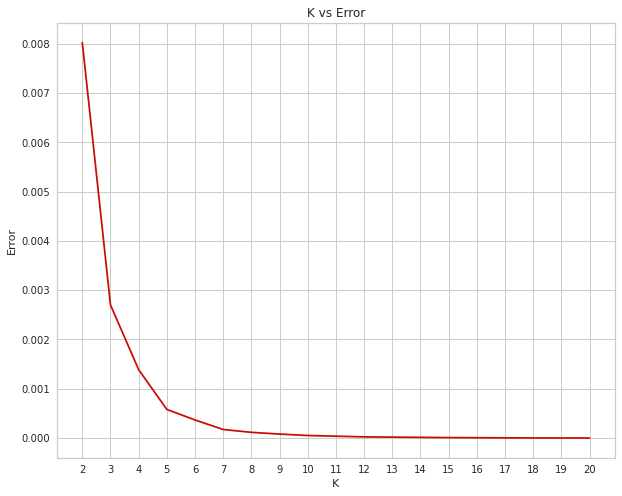

In [107]:

plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

In [108]:
!conda install -c districtdatalabs yellowbrick


from yellowbrick.cluster import KElbowVisualizer

Solving environment: done

# All requested packages already installed.



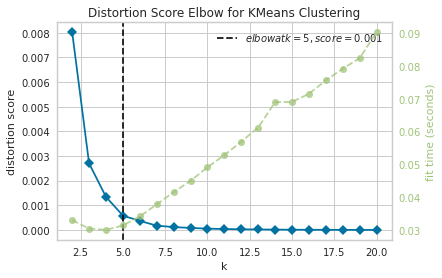

In [109]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [110]:
from sklearn.cluster import KMeans

In [111]:
kclusters = 4
toronto_grouped_clustering = ita.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 3, 2, 0, 1, 0, 0], dtype=int32)

In [112]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
to_merged = ita.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [113]:
to_merged.head()

,Neighbourhood,Italian Restaurant,Cluster Labels
0,Agincourt,0.000000,0
1,"Alderwood, Long Branch",0.000000,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0
3,Bayview Village,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.090909,3


In [114]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(toronto_venues.set_index("Neighbourhood"), on="Neighbourhood")

print(to_merged.shape)
to_merged.head()

(2167, 9)


,Neighbourhood,Italian Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.0,0,43.7942,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
0,Agincourt,0.0,0,43.7942,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant
0,Agincourt,0.0,0,43.7942,-79.262029,Twilight,43.791999,-79.258584,Lounge
0,Agincourt,0.0,0,43.7942,-79.262029,Mark's,43.791179,-79.259714,Clothing Store
0,Agincourt,0.0,0,43.7942,-79.262029,Commander Arena,43.794867,-79.267989,Skating Rink


In [115]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(2167, 9)


,Neighbourhood,Italian Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.000000,0,43.794200,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
47,Leaside,0.000000,0,43.709060,-79.363452,Local Leaside,43.710012,-79.363514,Sports Bar
46,Lawrence Park,0.000000,0,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
46,Lawrence Park,0.000000,0,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
46,Lawrence Park,0.000000,0,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
...,...,...,...,...,...,...,...,...,...
80,"The Danforth West, Riverdale",0.068182,3,43.679557,-79.352188,Dough Bakeshop,43.676643,-79.356846,Bakery
80,"The Danforth West, Riverdale",0.068182,3,43.679557,-79.352188,Marvel Coffee Co.,43.678630,-79.347460,Coffee Shop
80,"The Danforth West, Riverdale",0.068182,3,43.679557,-79.352188,Urban Nails,43.676668,-79.356602,Spa
80,"The Danforth West, Riverdale",0.068182,3,43.679557,-79.352188,Menchie's,43.678309,-79.348105,Frozen Yogurt Shop


Lets check how many Italian Restaurant are there

In [116]:
to_merged['Venue Category'].value_counts()['Italian Restaurant']

39

In [117]:
df.head ()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197
2,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,M4S,Central Toronto,Davisville,43.704324,-79.388790
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160


In [118]:
# create map
map_clusters = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighbourhood Latitude'], to_merged['Neighbourhood Longitude'], to_merged['Neighbourhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

In [119]:
ita["Cluster Labels"] = kmeans.labels_
ita.head()

,Neighbourhood,Italian Restaurant,Cluster Labels
0,Agincourt,0.000000,0
1,"Alderwood, Long Branch",0.000000,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0
3,Bayview Village,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.090909,3


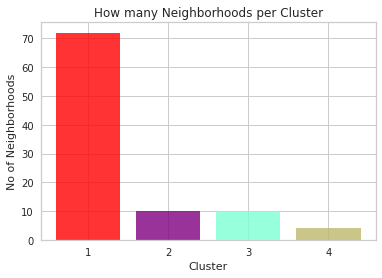

In [120]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = ita['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [121]:
# How many neighborhoods in each cluster
ita['Cluster Labels'].value_counts()

0    72
2    10
1    10
3     4
Name: Cluster Labels, dtype: int64

# # Analysis of each Cluster

# # Cluster 1

In [122]:

# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_new = df[['Borough', 'Neighbourhood']]
df_new.head()

,Borough,Neighbourhood
0,Central Toronto,Lawrence Park
1,Central Toronto,Davisville North
2,Central Toronto,"North Toronto West, Lawrence Park"
3,Central Toronto,Davisville
4,Central Toronto,"Moore Park, Summerhill East"


In [123]:
# Red 

cluster1 = to_merged.loc[to_merged['Cluster Labels'] == 0]
df_cluster1 = pd.merge(df_new, cluster1, on='Neighbourhood')
df_cluster1

,Borough,Neighbourhood,Italian Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Toronto,Lawrence Park,0.0,0,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
1,Central Toronto,Lawrence Park,0.0,0,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
2,Central Toronto,Lawrence Park,0.0,0,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
3,Central Toronto,Davisville North,0.0,0,43.712751,-79.390197,900 Mount Pleasant - Residents Gym,43.711671,-79.391767,Gym / Fitness Center
4,Central Toronto,Davisville North,0.0,0,43.712751,-79.390197,Sherwood Off-leash Dog Park,43.715711,-79.390118,Dog Run
...,...,...,...,...,...,...,...,...,...,...
1037,York,"Runnymede, The Junction North",0.0,0,43.673185,-79.487262,High Park Brewery,43.669903,-79.483430,Brewery
1038,York,"Runnymede, The Junction North",0.0,0,43.673185,-79.487262,195 Jane Rocket,43.672335,-79.492634,Bus Line
1039,York,"Runnymede, The Junction North",0.0,0,43.673185,-79.487262,Wonderfood,43.672352,-79.492571,Convenience Store
1040,York,Weston,0.0,0,43.706876,-79.518188,Wallace C. Swanek Park,43.708896,-79.522648,Park


In [124]:

# Purple 
cluster2=to_merged.loc[to_merged['Cluster Labels'] == 1]
df_cluster2 = pd.merge(df_new, cluster2, on='Neighbourhood')

In [125]:
df_cluster2.sort_values(["Italian Restaurant"], ascending=False)

,Borough,Neighbourhood,Italian Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
248,Downtown Toronto,Christie,0.062500,1,43.669542,-79.422564,Marian Engel Park,43.673754,-79.423988,Park
256,Downtown Toronto,Christie,0.062500,1,43.669542,-79.422564,Actinolite,43.667858,-79.428054,Restaurant
263,Downtown Toronto,Christie,0.062500,1,43.669542,-79.422564,Foto Grocery,43.667979,-79.428217,Grocery Store
262,Downtown Toronto,Christie,0.062500,1,43.669542,-79.422564,Garrison Creek Park,43.671690,-79.427805,Park
261,Downtown Toronto,Christie,0.062500,1,43.669542,-79.422564,Fiesta Farms,43.668471,-79.420485,Grocery Store
...,...,...,...,...,...,...,...,...,...,...
362,West Toronto,"High Park, The Junction South",0.038462,1,43.661608,-79.464763,Junction Grill,43.665210,-79.468461,Diner
361,West Toronto,"High Park, The Junction South",0.038462,1,43.661608,-79.464763,A&W,43.665520,-79.464731,Fast Food Restaurant
360,West Toronto,"High Park, The Junction South",0.038462,1,43.661608,-79.464763,Dollarama,43.665792,-79.465906,Discount Store
359,West Toronto,"High Park, The Junction South",0.038462,1,43.661608,-79.464763,ROUX,43.665418,-79.462392,Cajun / Creole Restaurant


In [126]:
df_cluster2['Venue Category'].value_counts(ascending=False)['Italian Restaurant']

19

In [127]:

# Blue
cluster3 = to_merged.loc[to_merged['Cluster Labels'] == 2]
df_cluster3 = pd.merge(df_new, cluster3, on='Neighbourhood')
df_cluster3

,Borough,Neighbourhood,Italian Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,"Garden District, Ryerson",0.020000,2,43.657162,-79.378937,JOEY Eaton Centre,43.656094,-79.381878,New American Restaurant
1,Downtown Toronto,"Garden District, Ryerson",0.020000,2,43.657162,-79.378937,BMV Books,43.657047,-79.381661,Bookstore
2,Downtown Toronto,"Garden District, Ryerson",0.020000,2,43.657162,-79.378937,lululemon athletica,43.653286,-79.380764,Clothing Store
3,Downtown Toronto,"Garden District, Ryerson",0.020000,2,43.657162,-79.378937,Ryerson Square,43.656988,-79.376896,Other Great Outdoors
4,Downtown Toronto,"Garden District, Ryerson",0.020000,2,43.657162,-79.378937,Disney Store,43.654248,-79.381232,Toy / Game Store
...,...,...,...,...,...,...,...,...,...,...
685,West Toronto,"Little Portugal, Trinity",0.021739,2,43.647927,-79.419750,Lost & Found,43.649378,-79.424149,Men's Store
686,West Toronto,"Little Portugal, Trinity",0.021739,2,43.647927,-79.419750,Cafe Neon,43.644130,-79.419670,Café
687,West Toronto,"Little Portugal, Trinity",0.021739,2,43.647927,-79.419750,Pho Tien Thanh,43.645484,-79.419276,Vietnamese Restaurant
688,West Toronto,"Little Portugal, Trinity",0.021739,2,43.647927,-79.419750,Pilot Coffee Roasters,43.646610,-79.419606,Coffee Shop


In [128]:

# Turquoise
cluster4 = to_merged.loc[to_merged['Cluster Labels'] == 3]
df_cluster4 = pd.merge(df_new, cluster4, on='Neighbourhood')
df_cluster4

,Borough,Neighbourhood,Italian Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,East Toronto,"The Danforth West, Riverdale",0.068182,3,43.679557,-79.352188,Kitchen Stuff Plus,43.678613,-79.346422,Furniture / Home Store
1,East Toronto,"The Danforth West, Riverdale",0.068182,3,43.679557,-79.352188,Factory Girl,43.676693,-79.356299,American Restaurant
2,East Toronto,"The Danforth West, Riverdale",0.068182,3,43.679557,-79.352188,Katsu Japanese Restaurant,43.678619,-79.347024,Sushi Restaurant
3,East Toronto,"The Danforth West, Riverdale",0.068182,3,43.679557,-79.352188,Carrot Commons,43.677485,-79.353076,Restaurant
4,East Toronto,"The Danforth West, Riverdale",0.068182,3,43.679557,-79.352188,Second Cup,43.677232,-79.352898,Coffee Shop
...,...,...,...,...,...,...,...,...,...,...
87,West Toronto,"Parkdale, Roncesvalles",0.071429,3,43.648960,-79.456325,Scout,43.650970,-79.450866,Gift Shop
88,West Toronto,"Parkdale, Roncesvalles",0.071429,3,43.648960,-79.456325,Reunion Island Coffee Bar,43.650463,-79.450610,Coffee Shop
89,West Toronto,"Parkdale, Roncesvalles",0.071429,3,43.648960,-79.456325,Domani Restaurant & Wine Bar,43.649235,-79.450229,Italian Restaurant
90,West Toronto,"Parkdale, Roncesvalles",0.071429,3,43.648960,-79.456325,Revue Cinema,43.651112,-79.450961,Movie Theater


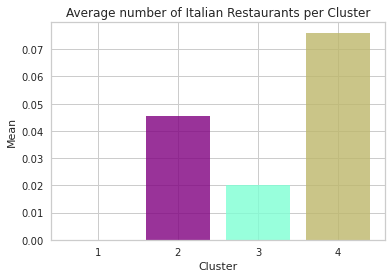

In [129]:
clusters_mean = [df_cluster1['Italian Restaurant'].mean(),df_cluster2['Italian Restaurant'].mean(),df_cluster3['Italian Restaurant'].mean(),
                 df_cluster4['Italian Restaurant'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Italian Restaurants per Cluster')

plt.show()

Observations :
Most of the Italian Restaurants are in cluster 4 represented by the darkkhaki cluster based on the Average no. The Neighborhoods located in the Central and Western Toranto area . Even though there is a huge amount of Neighborhoods in cluster 1 (70+), there is little to no Italian Restaurant. Looking at the nearby venues, the optimum place to put a new Italian Restaurant is in East Toronto as their are many Neighborhoods in the area but little to no Italian Restaurants therefore, eliminating any competition. The second best Neighborhoods that have a great oppurtunity would be in areas suchas Garden street and Little portugal which is in Cluster 3. Having 10 neighborhoods in the area with no Italian Restaurants gives a good oppurtunity for opening up a new restaurant while choosing which place to open a new Italian restaurant. The analysis does not take into consideration of the Italian population across neighborhoods as this can play a huge factor in selecting the neighbourhood.
This concludes the optimal findings for this project and recommends the entrepreneur to open an authentic Italian restaurant in these locations with little to no competition. Nonetheless, if the food is authentic, affordable and good taste, I am confident that it will have great following everywhere.